# Data Mining for Business Analytics

## Similarity, Neighbors

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***


In [1]:
# Import the libraries we will be using
import numpy as np
from numpy import linalg as LA
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 10, 8



## Example 1: Wine Recommendation

**Customer:** I'd like to order the _Cabernet Sauvignon_ 

**Waiter:** We're just out of this wine.

**Customer:** What would be _the closest_ wine that you currently have?

**Waiter:** We have some very nice _Merlot_ or you could try the _Malbec-Cabernet_

<br/>

#### <div style="color: red">Is there a <u>target variable</u> that we can use?</div>
**ANS:**
no, since we're just looking for similar things, but not specific features.
    
#### <div style="color: red">How did the waiter know about this recommendation?</div>
**ANS:**
Some features include _target customers, color, price range, origin, type of grapes / flavor_

#### <div style="color: red">Did she/he know that the customer _will like_ the suggestion? How would _you_ make such a recommendation ?</div>
**ANS:**
The waiter does not know for sure that the customer will like it. However, given that the customer likes a type of wine (Cabernet Sauvignon in this case), there is a high possibility that the customer may like it -- so why not give it a try to suggest it?


## Example 2: Plagiarism Detection / Near-Duplicate Detection in Web Search


Plagiarism is not just an unethical practice, but can also have legal ramifications. Plagiarism arises when someone (a person, an entity) copies someone else's (literary) work (without the proper attribution) and tries to pass it as their own.

<br/>

<div style="text-align: right"><i>"When you steal from one author, it's plagiarism; if you steal from many, it's research."<br/> Wilson Mizner</i>
</div>


Meanwhile, when you search the web with your favorite search engine, you'd like to get back results, each of which conveys _new_ information. That is, if all of the first 10 results **all** present **the same** information, you'd not be very happy about it. The first link will have new information (and answer your question), the second one may just reinforce what you learned from the 1st link, but after that it's just more of the same.


Notice that these two problems are effetively the same. The way that the results are used is different in the two scenarios.

<br/>

#### <div style="color: red">How can we solve this problem?</div>

**ANS:**
Use tf-idf 
***


## Example 3: Player Substitution

Imagine that you're playing your favorite video game (football, basketball, etc) and one of the players gets injured and needs to be taken off the court / field. 


#### <div style="color: red">Is there a <u>target variable</u> that we can use?</div>
**ANS:**
no, since we're just looking for similar things, but not specific features.


#### <div style="color: red">Which player do you replace them with?</div>
**ANS:**
Similar to the wine problem, but with players... Swap the ones that are most similar in terms of features.
Some features include: Position, stamina, experience, speed, etc.

***


#### Fundamental Question

We have seen various classifiers until now. The main question to answer here is the following:

**<div style="text-align: center">Do we have a target variable that we can use?</div>** 

- No. Because for all of the problems above, we're simply comparing without having a specific feature.

-

-

-

-

-

-

### _Show me your friends..._

Unlike magnets, _similars_ attract when it comes to people. That is, our friends' interests are more aligned with our own. Another way to see this is that we may tend to befriend individuals who have _common interests_ with our own.

In abstract terms, we are _more similar_ with people we are friends with and _less similar_ with people who we (knowingly / decidedly) aren't friends with.


***


### What are you talking about?

Similarity between **people**? Between **wines**? Between **texts**? What are you talking about? How can these things be possibly related?

#### Let's start simple

- Can you determine the similarity between two integers? For example, which two numbers would you say are _more similar_? Numbers 9 and 10,  or the numbers 1 and 100?
    * What about negative numbers? How about -3 and -4 compared against -100 and -98?


- Can you come up with a similarity measure for two real-valued numbers? Is it any different from integer values?


- Can you measure the similarity between GPS signals? A GPS signal is a pair of (x, y) coordinates, commonly refered to as _latitude_ and _longitude_. Let's say that you are given 3 pairs of such GPS coordinates:
    * **GPS 1:** (1, 1)
    * **GPS 2:** (1, 0.5)
    * **GPS 3:** (2, 2)
    
  Which pair of GPS coordinates is _more similar_ ? How did you compute the similarity? <br>
***Note differences between Euclidean Distance (stragiht line between 2 pts) & Manhattan Distance (grid)**
<br>

**ANS:**
In this case, we use the Manhattan Distance instead of the Euclidean Distance


- OK, let's go for something more involved. Imagine that you are given 3 baskets with fruits:
    * **Basket 1:** Fruit_1, Fruit_2, Fruit_3
    * **Basket 2:** Fruit_1, Fruit_2, Fruit_4, Fruit_5
    * **Basket 3:** Fruit_3, Fruit_2
    
  What if our basket had multiples of the same fruit, e.g., **Bakset 1:** Fruit_1, Fruit_1, Fruit_2, Fruit_3 ?
    
***

Apr. 10th, 2019
### Back to the difficult cases

How do you define the similarity between:

- Two _wines_?
- Two _pieces of text_ ?
- Two _people_ ?

Generalizing from our previous examples, we are discussing about the similarity of _objects_. 

**Question:** Did we use just a single similarity?

In case it's also not obvious by now, **to compute the similarity between _objects_ we need to have quantifiable _features_**.

## Enough talk! Let's work with some Data

Following that discussion, we have compiled a scotch whiskey data set. You can find it in `data/scotch.csv`.

The data consists of 5 general whiskey attributes, each of which has many possible values:

- **Color**: yellow, very pale, pale, pale gold, gold, old gold, full gold, amber, etc.
- **Nose**: aromatic, peaty, sweet, light, fresh, dry, grassy, etc.
- **Body**: soft, medium, full, round, smooth, light, firm, oily.
- **Palate**: full, dry, sherry, big, fruity, grassy, smoky, salty, etc.
- **Finish**: full, dry, warm, light, smooth, clean, fruity, grassy, smoky, etc.

Let's read the file in and take a look. For convenience, we have also dummysized the data. There are a few other features unrelated to the ones above. For this class, we will be dropping them. However, feel free to check them out!



In [2]:
data = pd.read_csv("data/scotch.csv")

data = data.drop([u'age', u'dist', u'score', u'percent', u'region', u'district', u'islay', u'midland', u'spey', u'east', u'west', u'north ', u'lowland', u'campbell', u'islands'], axis=1)

In [3]:
data.head()

,color.wine,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,color.p.amber,...,fin.smoke,fin.sweet,fin.spice,fin.oil,fin.salt,fin.arome,fin.ling,fin.long,fin.very,fin.quick
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0



We've discussed earlier that there are many similarity measures.  Similarity is often cast as "closeness" in some space, computed by a distance measure.  Often in data science, the terms similarity and distance are used interchangeably (a little strangely to the uninitiated). 

We'll use the library scipy.spatial.distance available [here](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

This library has functions to compute the distance between two **numeric** vectors. In particular, **pdist(X[, metric, p, w, V, VI])**	computes pairwise distances between the observations in n-dimensional space.

The _metric_ parameter refers to the **distance function** used to compute the distance between the instances (observations) and can be:
* ‘braycurtis’, 
* ‘canberra’, 
* ‘chebyshev’, 
* ‘cityblock’, 
* ‘correlation’, 
* ‘cosine’, 
* ‘dice’, 
* ‘euclidean’, 
* ‘hamming’, 
* ‘jaccard’, 
* ‘kulsinski’, 
* ‘mahalanobis’, 
* ‘matching’, 
* ‘minkowski’, 
* ‘rogerstanimoto’, 
* ‘russellrao’, 
* ‘seuclidean’, 
* ‘sokalmichener’, 
* ‘sokalsneath’, 
* ‘sqeuclidean’, 
* ‘yule’

Before diving in deep, let's see how the method actually works

In [4]:
# Euclidean Distance
sample_data = [ [1,2,3], [4,5,6], [7,8,9] ]
distance.pdist(sample_data, 'euclidean')

array([ 5.19615242, 10.39230485,  5.19615242])

Well, having all of that in the same row isn't particularly helpful. What are we really looking at here?
Let's better format our output.

In [20]:
# Euclidean Distance
sample_data = [ [1,2,3], [4,5,6], [7,8,9] ]
distance.squareform(distance.pdist(sample_data, 'euclidean'))

array([[ 0.        ,  5.19615242, 10.39230485],
       [ 5.19615242,  0.        ,  5.19615242],
       [10.39230485,  5.19615242,  0.        ]])

**Note the diff between Jaccard similarity matrix & the correlation matrix (1 on the diagonal instead of 0).** <br>
OK, that's better. Let's do the same for the other distances.

In [6]:
# What about Jaccard distance
sample_data = [ [0,0,1,1,1], [0,0,1,0,1], [1,0,0,0,1] ]
distance.squareform(distance.pdist(sample_data, 'jaccard'))

array([[0.        , 0.33333333, 0.75      ],
       [0.33333333, 0.        , 0.66666667],
       [0.75      , 0.66666667, 0.        ]])

**Note that the resulted array is in the row space of the sample_data matrix**

In [7]:
a = np.array([0,0,1,1,1,0,0,1,0,1,1,0,0,0,1])
b = a.reshape((3, 5))
print(b)
LA.norm(b, np.inf)

[[0 0 1 1 1]
 [0 0 1 0 1]
 [1 0 0 0 1]]


3.0

In [8]:
# What about Hamming distance
sample_data = [ [0,0,1,1,1], [0,0,1,0,1], [1,0,0,0,1] ]
distance.squareform(distance.pdist(sample_data, 'hamming'))

array([[0. , 0.2, 0.6],
       [0.2, 0. , 0.4],
       [0.6, 0.4, 0. ]])


Alright, now that we got the hang of it, let's make our life easier as follows.  Here is a function that will compute a number of distances of interest that we will provide ( $distance_measures$ parameter ).

In [9]:

def whiskey_distance(whiskey_name, distance_measures, k):
    
    """
    whiskey_name: The name of the whiskey to search for
    distance_measures: A list containing the different distances that we want to compute
    k: The number of similar objects that we want to retrieve
    """
    
    # We want a data frame to store the output
    # distance_measures is a list of the distance measures you want to compute (see below)
    # n is how many "most similar" to report
    distances = pd.DataFrame()
    
    # Find the location of the whiskey we are looking for
    whiskey_location = np.where(data.index == whiskey_name)[0][0]

    # Go through all distance measures we care about
    for distance_measure in distance_measures:
        # Find all pairwise distances
        current_distances = distance.squareform(distance.pdist(data, distance_measure))
        # Get the closest n elements for the whiskey we care about
        most_similar = np.argsort(current_distances[:, whiskey_location])[0:k]
        # Append results (a new column to the dataframe with the name of the measure)
        distances[distance_measure] = list(zip(data.index[most_similar], current_distances[most_similar, whiskey_location]))
    return distances


In [10]:

# Let's test the distance of one of the whiskeys that are in there
whiskey_distance('Bunnahabhain', ['euclidean'], 6)

,euclidean
0,"(Bunnahabhain, 0.0)"
1,"(Glenglassaugh, 3.0)"
2,"(Ardberg, 3.1622776601683795)"
3,"(Bruichladdich, 3.1622776601683795)"
4,"(Tullibardine, 3.3166247903554)"
5,"(Caperdonich, 3.4641016151377544)"


What about more distances? What is the output then?

In [11]:
#Let's try more distances for the same whiskey
whiskey_distance('Bunnahabhain', ['euclidean', 'cityblock', 'cosine', 'jaccard'], 10)

,euclidean,cityblock,cosine,jaccard
0,"(Bunnahabhain, 0.0)","(Bunnahabhain, 0.0)","(Bunnahabhain, 0.0)","(Bunnahabhain, 0.0)"
1,"(Glenglassaugh, 3.0)","(Glenglassaugh, 9.0)","(Glenglassaugh, 0.4729537233052701)","(Glenglassaugh, 0.6428571428571429)"
2,"(Ardberg, 3.1622776601683795)","(Ardberg, 10.0)","(Tullibardine, 0.4737651884157824)","(Tullibardine, 0.6470588235294118)"
3,"(Bruichladdich, 3.1622776601683795)","(Bruichladdich, 10.0)","(Glenmorangie, 0.49290744716289003)","(Glenmorangie, 0.6666666666666666)"
4,"(Tullibardine, 3.3166247903554)","(Tullibardine, 11.0)","(Bruichladdich, 0.5000000000000001)","(Bruichladdich, 0.6666666666666666)"
5,"(Caperdonich, 3.4641016151377544)","(Caperdonich, 12.0)","(Ardberg, 0.5000000000000001)","(Ardberg, 0.6666666666666666)"
6,"(Deanston, 3.4641016151377544)","(Deanston, 12.0)","(Glen Deveron, 0.5101020514433645)","(Glen Deveron, 0.6842105263157895)"
7,"(Bowmore, 3.4641016151377544)","(Bowmore, 12.0)","(Oban, 0.5398210066915778)","(Cragganmore, 0.7058823529411765)"
8,"(Glen Elgin, 3.4641016151377544)","(Glen Elgin, 12.0)","(Springbank, 0.5398210066915778)","(Glen Elgin, 0.7058823529411765)"
9,"(Benriach, 3.4641016151377544)","(Benriach, 12.0)","(Glenlossie, 0.5398210066915778)","(Oban, 0.7142857142857143)"


## Show me your friends... and I'll make a prediction

Is that the only thing we can do with similarity? No, not really.  We can also use similarity between objects (i.e., instances) to make _predictions_. To do so, we need to have labels on the _similar_ instances. How do you think we would do that?

See the image below to guide your thinking. We want to classify the green instance. What should its class be?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/850px-KnnClassification.svg.png" width="30%" />

[Source: Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg)

***


The above approach is known as a **$k$-Nearest Neighbor** (**kNN**) classifier, because it finds the $k$ _most similar_ neighbors of the _instance_ that we want to predict.

In the example of the Figure above, we used the Euclidean distance between two items (because... circles!). We collected the $k$ most similar instances in our datasets and combined their target variables to make our prediction.

**Question:** How did we combine the target variables of the neighbors?
> 1) look at what the **majority** is in the given distance ($k$); <br>
2) look at the **weighted-distance** majority

**Question:** How would we combine the target variable for a _regression_ problem?
> 

**Question:** **kNN** is a _lazy_ classifier. Can you think why we call it that?
> We're **not learning a model**. For building a model, we need the _entire dataset_. However, we only need $k$ amount of data for kNN.

**Question:** What happens if we set $k$ to a _very large_ value, e.g., the total number of instances in our dataset?
> (_Note: $k$ can be larger than the # of instances._)
> In this case, the result will just be dependent on the majority of the total instances. Its significance will depend on the problem we're trying to solve.

Let's work with our mailing campaign dataset which has a target variable.

In [12]:
mail_data = pd.read_csv("data/mailing.csv")
mail_data = pd.get_dummies(mail_data)
mail_data.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_D,rfaa2_E,rfaa2_F,rfaa2_G,pepstrfl_0,pepstrfl_X
0,3,9409,9509,0.06,1,50,30.00,0,0,0,0,1,1,0
1,2,9201,9602,0.16,4,20,20.55,1,0,0,0,1,0,1
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,0,1,0
3,6,9409,9603,0.13,2,25,22.50,0,0,0,0,1,1,0
4,0,9310,9511,0.10,1,25,12.50,0,0,0,0,1,1,0


In [13]:
# The "data" dataframe contains everything together.
# Get the features separately from the class.
X = mail_data.drop(['class'], axis=1)
Y = mail_data['class']

In [14]:
# Keep 75% of the data for training and 25% for testing. We have used this method before.
X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test = train_test_split(X, Y, train_size=.75)

/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


***
Great! We've read the data in, let's now learn a **kNN** classifier on our data.  The main parameter to consider here is the $k$ value, i.e., the number of neighbors that we want to base our decision making on.  For a full description of the parameters that the **kNN** classifier takes is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

For example, check what happens when the **weights** parameter isn't specified, versus the parameter being set to 'distance', i.e., **weights='distance'**.

Also, check out the parameter **p** which controls the power of the Minkowski distance.

The **metric** parameter controls which distance measure to consider between instances. More details about the values that the **metric** parameter can take can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

In [15]:
# Let's train a k-Nearest Neighbor classifier
# model_mailing = KNeighborsClassifier(10)
model_mailing = KNeighborsClassifier(10, weights='distance')   # Also try it with weights='distance'
model_mailing.fit(X_mailing_train, Y_mailing_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [16]:
# Apply the trained model on the testing dataset and get the predicted classes
predictions = model_mailing.predict(X_mailing_test)

# Let's generate a confusion matrix
conf_mtx = metrics.confusion_matrix(Y_mailing_test, predictions, labels=[1, 0])

# Let's turn the confusion matrix into a DataFrame, to make it more presentable
conf_mtx_df = pd.DataFrame(conf_mtx.T, columns=['(True) p', '(True) n'], index=['[Predicted] Y', '[Predicted] N'])
conf_mtx_df

,(True) p,(True) n
[Predicted] Y,18,118
[Predicted] N,2371,45438


### Try it out with some different $k$-values

In [17]:

for k in [1, 10, 50, 100, 1000, 2000]:
    model = KNeighborsClassifier(k, weights='distance')
    model.fit(X_mailing_train, Y_mailing_train)
    print ("Accuracy with k = %d is %.3f" % (k, metrics.accuracy_score(Y_mailing_test, model.predict(X_mailing_test))) )
    

Accuracy with k = 1 is 0.905
Accuracy with k = 10 is 0.948
Accuracy with k = 50 is 0.949
Accuracy with k = 100 is 0.949
Accuracy with k = 1000 is 0.950
Accuracy with k = 2000 is 0.950


### In-Class / Take-Home Assignment (Ungraded)

Pick several non-negative integers, in ascending order, e.g., 1, 5, 10, 20, 50, or other values that you want. Each integer $d$ corresponds to the number of _features_ that you'll "have" available.

Create two simple instances, both of which have the same number of features $d$. One instance will be all zeros and another one will be all ones. For example, if $d = 5$, then:
$$ x_0 = (0, 0, 0, 0, 0) $$
$$ x_1 = (1, 1, 1, 1, 1) $$

To easily generate these instances, check the methods `np.zeros()` and `np.ones()` from the numpy library. More information here: 
* np.ones() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
* np.zeros() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html


Compute and print the Euclidean distance (L2) between the two instances, $x_0$ and $x_1$. Use the `distance.pdist()` method to compute easily compute the Euclidean distance between the instances.

**Question 1:** What is happening with the distance as we add more features?

**Question 2:** Repeat the same assignment, but generate instances with **randon** feature values. Check the `np.random.rand()` method (here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html#numpy.random.rand ) for how to do this conveniently. Since you are working with _random_ values, you should rerun the distances several times and get the average.

In [30]:
# Your code here
def eu_dists_over_d(d):
    eu_dist = []
    for n in range(1,d+1):
        eu_dist.append(distance.pdist([np.zeros(n),np.ones(n)]))
    
    plt.plot(list(range(1,d+1)),eu_dist)

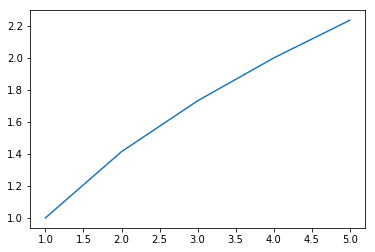

In [32]:
# Plot the distances above, to see how they actually behave
eu_dists_over_d(5)

### Question for you

- Advantages of kNN ?

> 1. Easier to explain/understand; <br>
> 2. Scattered data; <br>
> 3. Don't require a large amount of dataset; <br>
> 4. Easy to implement.

- Disadvantages of kNN ?

> 1. Absolute distances; <br>
> 2. hi.

- Also check the previous questions in this notebook.

